<div class="alert alert-info" style="background-color:#f07914; color:white; padding:0px 10px; border-radius:5px; text-align: center;font-weight:600;font-family:Helvectica"><h2 style='margin:10px 5px 10px'>Car Price Prediction</h2>
</div>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load the Data</h2>
</div>

In [440]:
#Importing Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import BaggingRegressor

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Overview of the Data</h2>
</div>

In [441]:
#Reading Data using Pandas
price_df = pd.read_csv(r'C:\Users\Owner\Downloads\CarPricePrediction\train.csv')
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [442]:
#Replacing all random values with null
missing_values = ["n/a", "na", "--","-"]
price_df = pd.read_csv(r'C:\Users\Owner\Downloads\CarPricePrediction\train.csv', na_values = missing_values)
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>

In [443]:
#Analysis of Columns and Datatypes and Null Count
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
ID                  19237 non-null int64
Price               19237 non-null int64
Levy                13418 non-null float64
Manufacturer        19237 non-null object
Model               19237 non-null object
Prod. year          19237 non-null int64
Category            19237 non-null object
Leather interior    19237 non-null object
Fuel type           19237 non-null object
Engine volume       19237 non-null object
Mileage             19237 non-null object
Cylinders           19237 non-null float64
Gear box type       19237 non-null object
Drive wheels        19237 non-null object
Doors               19237 non-null object
Wheel               19237 non-null object
Color               19237 non-null object
Airbags             19237 non-null int64
dtypes: float64(2), int64(4), object(12)
memory usage: 2.6+ MB


In [444]:
#Understanding the columns
price_df.dtypes.value_counts()

object     12
int64       4
float64     2
dtype: int64

<h4><p style="color:#0d45be">There are a total of 18 columns where 12 are categorical and 6 are numerical.</p></h4>

In [445]:
#Changing the categorical to numerical columns
price_df['Mileage'] = price_df['Mileage'].str.replace('km', '')
price_df['Engine volume'] = price_df['Engine volume'].str.replace('Turbo', '')
price_df = price_df.astype({"Mileage": 'int64',"Engine volume":"float64"})
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [446]:
price_df['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
PONTIAC             1
GREATWALL           1
ASTON MARTIN        1
TESLA               1
LANCIA              1
Name: Manufacturer, Length: 65, dtype: int64

In [447]:
#Summary of data to get an overview of basic statistics
price_df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


<h4><p style="color:#0d45be">The standard deviation of Levy is quite high as compared to other variables.</p></h4>

#### Numerical Variable Analysis 

In [448]:
#Analysis of Numerical Columns
num_df = price_df.select_dtypes(exclude = 'object').copy()
num_df.head()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,45654403,13328,1399.0,2010,3.5,186005,6.0,12
1,44731507,16621,1018.0,2011,3.0,192000,6.0,8
2,45774419,8467,NaN,2006,1.3,200000,4.0,2
3,45769185,3607,862.0,2011,2.5,168966,4.0,0
4,45809263,11726,446.0,2014,1.3,91901,4.0,4


In [449]:
for i in num_df.columns:
    print("Column: ",i," Len: ",len(num_df[i].unique()))

Column:  ID  Len:  18924
Column:  Price  Len:  2315
Column:  Levy  Len:  559
Column:  Prod. year  Len:  54
Column:  Engine volume  Len:  65
Column:  Mileage  Len:  7687
Column:  Cylinders  Len:  13
Column:  Airbags  Len:  17


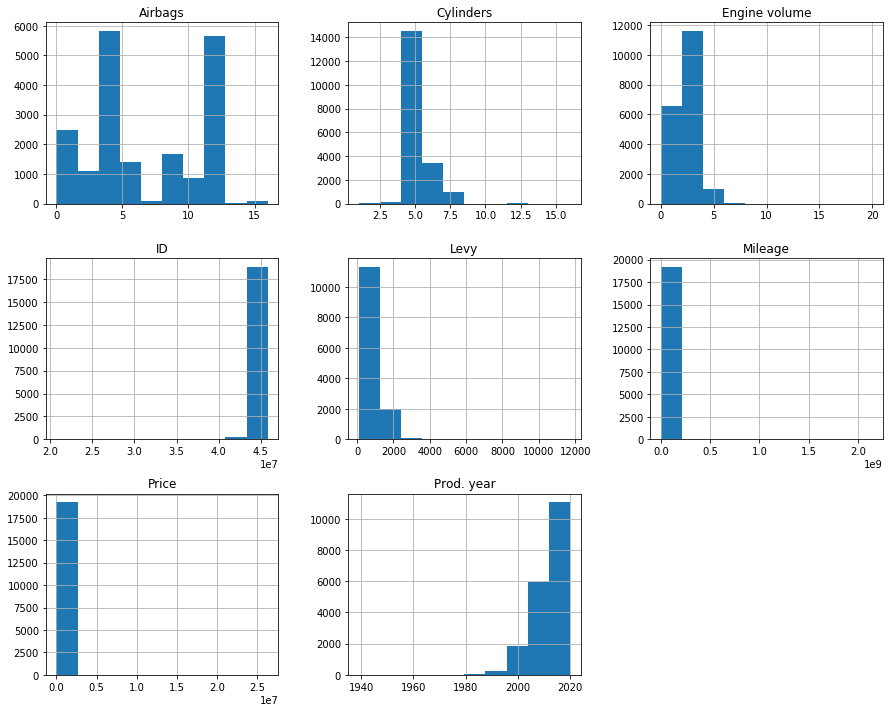

In [450]:
price_df.hist(figsize=(15,12),bins = 10)
plt.title("Features Distribution")
plt.show()

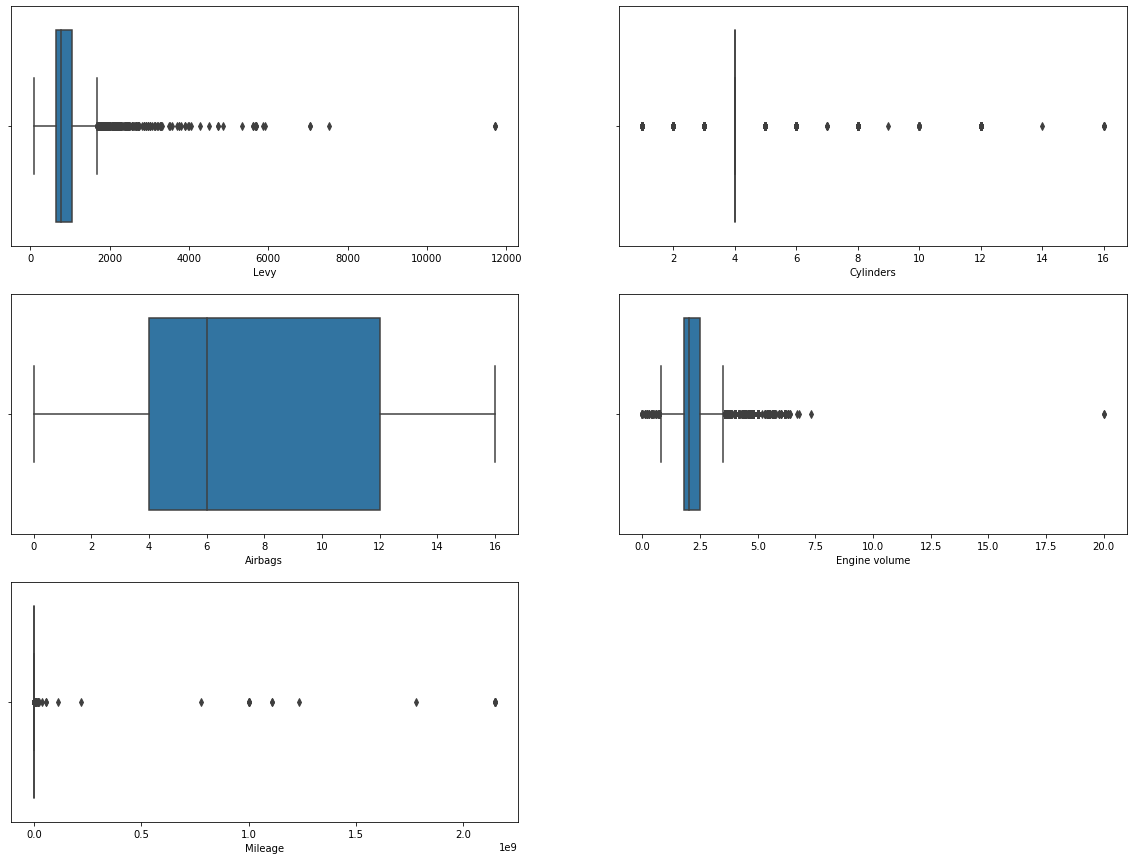

In [451]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.boxplot(x="Levy", data=price_df,ax = ax1)

ax1 = fig.add_subplot(3,2,2) 
sns.boxplot(x="Cylinders", data=price_df,ax = ax1)

ax1 = fig.add_subplot(3,2,3) 
sns.boxplot(x="Airbags", data=price_df,ax = ax1)

ax1 = fig.add_subplot(3,2,4) 
sns.boxplot(x="Engine volume",data=price_df,ax=ax1)

ax1 = fig.add_subplot(3,2,5) 
sns.boxplot(x="Mileage", data=price_df,ax = ax1)
plt.show()

<h4><p style="color:#0d45be">Levy, Mileage and Engine Volume shows skewness and there outliers observed too.</p></h4>

In [452]:
print(price_df['Levy'].skew())
print(price_df['Mileage'].skew())
print(price_df['Engine volume'].skew())

5.449954090897364
38.89682127467135
2.1862419140120277


#### Categorical Variable Analysis 

In [453]:
#Analysis of Categorical Columns
cat_df = price_df.select_dtypes(include = 'object').copy()
cat_df.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver


In [454]:
for i in cat_df.columns:
    print("Column: ",i," Len: ",len(cat_df[i].unique()))

Column:  Manufacturer  Len:  65
Column:  Model  Len:  1590
Column:  Category  Len:  11
Column:  Leather interior  Len:  2
Column:  Fuel type  Len:  7
Column:  Gear box type  Len:  4
Column:  Drive wheels  Len:  3
Column:  Doors  Len:  3
Column:  Wheel  Len:  2
Column:  Color  Len:  16


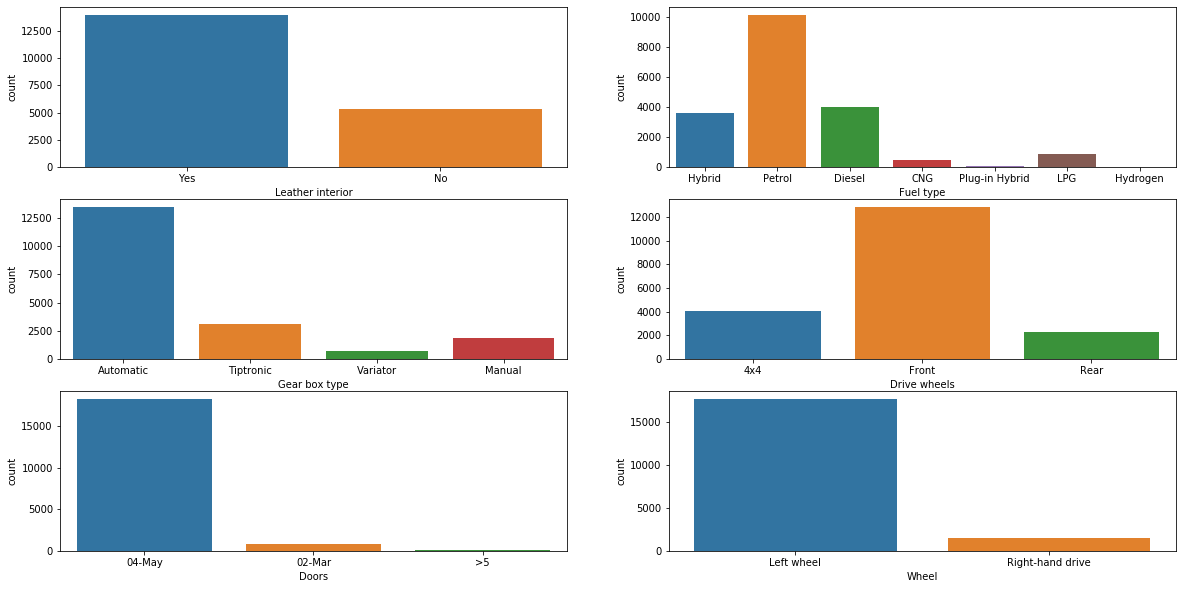

In [455]:
fig = plt.figure(figsize=(20,10))
counter = 1
for i in cat_df.columns:
    if len(cat_df[i].unique()) < 10:
        ax1 = fig.add_subplot(3,2,counter) 
        sns.countplot(data = price_df, x = i)
        if counter == 6:
            plt.show()
            counter = 1
        else:
            counter = counter+1
plt.show()

<h4><p style="color:#0d45be">Most of cars are with leather interiors and fuel type is petrol. There are more number of automatic cars with front and left-hand drive wheels.</p><p style="color:#0d45be">There is some oddity/random values seen in doors column.</p></h4>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preparation</h2>
</div>

#### Removing Skewness

In [456]:
print(price_df['Levy'].quantile(0.10))
print(price_df['Levy'].quantile(0.90))
print("---")

price_df["Levy"] = np.where(price_df["Levy"] <521.0, 521.0,price_df['Levy'])
price_df["Levy"] = np.where(price_df["Levy"] >1399.0, 1399.0,price_df['Levy'])
print(price_df['Levy'].skew())

521.0
1399.0
---
0.5938232625878801


In [457]:
print(price_df['Mileage'].quantile(0.10))
print(price_df['Mileage'].quantile(0.90))

print("---")

price_df["Mileage"] = np.where(price_df["Mileage"] <25061.40, 25061.40,price_df['Mileage'])
price_df["Mileage"] = np.where(price_df["Mileage"] >265210.0, 265210.0,price_df['Mileage'])
print(price_df['Mileage'].skew())

25061.400000000005
265210.0
---
0.2791510602246839


#### Plotting Columns after removal of Skewness

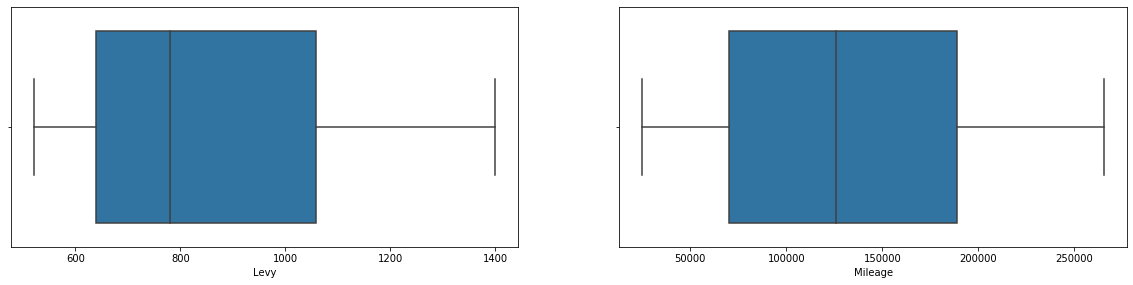

In [458]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.boxplot(x="Levy", data=price_df,ax = ax1)
ax1 = fig.add_subplot(3,2,2) 
sns.boxplot(x="Mileage", data=price_df,ax = ax1)
plt.show()

In [459]:
price_df.corr()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
ID,1.000000,-0.000844,-0.017158,0.071352,-0.012232,0.030272,-0.039319,-0.020527
Price,-0.000844,1.000000,0.083333,0.012982,0.008753,-0.025937,0.007518,-0.012824
Levy,-0.017158,0.083333,1.000000,-0.165967,0.672455,0.077321,0.599165,0.118465
Prod. year,0.071352,0.012982,-0.165967,1.000000,-0.030906,-0.261369,-0.096797,0.236969
Engine volume,-0.012232,0.008753,0.672455,-0.030906,1.000000,0.167307,0.778524,0.224441
Mileage,0.030272,-0.025937,0.077321,-0.261369,0.167307,1.000000,0.145136,-0.033794
Cylinders,-0.039319,0.007518,0.599165,-0.096797,0.778524,0.145136,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.118465,0.236969,0.224441,-0.033794,0.176868,1.000000


<h4><p style="color:#0d45be">There is no significance correlation in any predictor and target variable.</p></h4>
<h4><p style="color:#0d45be">On the other hand, there is quite significant correlation between few independent variables eg:- Levy,EngineVolume,Cylinder. This might be cause multicollinearity issue.</p></h4>

In [460]:
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,521.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<h4><p>Removing unwanted Columns</p></h4>

In [461]:
#Dropping the doors column as it presuming it contains wrong data
price_df.drop(['Doors'], axis = 1,inplace=True)

price_df.drop(['ID'], axis = 1,inplace=True)

price_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,Left wheel,White,0
4,11726,521.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4


#### Removing duplicates and Null Values.

In [462]:
#Checking for duplicates
duplicate = price_df[price_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))
print("Total number of records with duplicated: ",len(price_df))

price_df = price_df.drop_duplicates()
duplicate = price_df[price_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))
print("Total number of records after dropping duplicates: ",len(price_df))

Total number of duplicated:  3725
Total number of records with duplicated:  19237
Total number of duplicated:  0
Total number of records after dropping duplicates:  15512


In [463]:
#Checking for null/nan values
for i in range(price_df.shape[1]):
# count number of rows with missing values
    n_miss = price_df.iloc[:, i].isnull().sum().sum()
    perc = n_miss / len(price_df) * 100
    if(n_miss>0):
        print('Columns: %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Columns: 1, Missing: 5683 (36.6%)


#### Missing Value Imputation

In [464]:
price_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,Left wheel,White,0
4,11726,521.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4


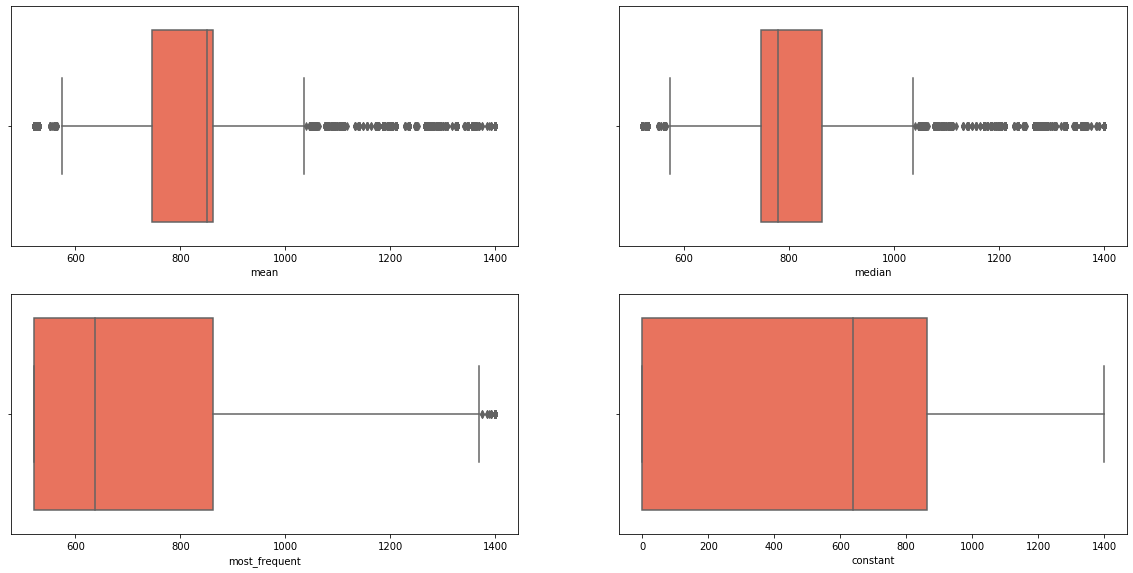

In [465]:
list_operations = ['mean','median','most_frequent','constant']
results = list()
data = price_df.values 
X = data[:,1:2] 
y = data[:, 1] 
for s in list_operations:
    imputer=SimpleImputer(missing_values=np.nan,strategy=s,fill_value=0)
    imputer.fit(X) 
    X_trans = imputer.transform(X) 
    results.append(X_trans)

fig = plt.figure(figsize=(20,15))
count = 1
for i,j in zip(results,list_operations):
    ax1 = fig.add_subplot(3,2,count)    
    x= sns.boxplot(x=i.ravel(),ax = ax1,color='tomato')
    x.set_xlabel(j)
    count = count + 1
plt.show()

<h4><p style="color:#0d45be">Imputing the missing values in 'Levy' column and after plotting the boxplot, we can infer that 'constant' looks the best imputation as it is does not add any outliers whereas mean adds a lot of outliers.</p><p style="color:#0d45be">Thus, we should go ahead with 'constant' imputation.</p></h4>

In [466]:
data = price_df.values 
X = data[:,1:2] 
y = data[:, 1] 
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
imputer.fit(X) 
X_trans = imputer.transform(X) 
price_df['Levy']=X_trans

In [467]:
#Checking for null/nan values
for i in range(price_df.shape[1]):
# count number of rows with missing values
    n_miss = price_df.iloc[:, i].isnull().sum().sum()
    perc = n_miss / len(price_df) * 100
    print('Columns: %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Columns: 0, Missing: 0 (0.0%)
Columns: 1, Missing: 0 (0.0%)
Columns: 2, Missing: 0 (0.0%)
Columns: 3, Missing: 0 (0.0%)
Columns: 4, Missing: 0 (0.0%)
Columns: 5, Missing: 0 (0.0%)
Columns: 6, Missing: 0 (0.0%)
Columns: 7, Missing: 0 (0.0%)
Columns: 8, Missing: 0 (0.0%)
Columns: 9, Missing: 0 (0.0%)
Columns: 10, Missing: 0 (0.0%)
Columns: 11, Missing: 0 (0.0%)
Columns: 12, Missing: 0 (0.0%)
Columns: 13, Missing: 0 (0.0%)
Columns: 14, Missing: 0 (0.0%)
Columns: 15, Missing: 0 (0.0%)


In [468]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif_cal_df = price_df.select_dtypes(exclude = 'object').copy()
vif_cal_df = vif_cal_df.iloc[:,1:]
calc_vif(vif_cal_df)

,variables,VIF
0,Prod. year,19.038964
1,Engine volume,18.658703
2,Mileage,4.071369
3,Cylinders,35.581206
4,Airbags,3.891320


<h4><p style="color:#0d45be">There is definetly multicollinearity amongst independent variables.</h4></p>

#### One Hot Encoding of Categorical Data
##### since the data is not ordinal

In [469]:
#Listing the columns to be one-hot encoded
cat_df.columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [470]:
#Creating one-hot encoding using dummies for all categorical columns
price_df = pd.get_dummies(price_df, columns = ['Manufacturer','Model','Category','Fuel type','Gear box type',
                                                       'Drive wheels','Wheel','Color','Leather interior'])
price_df.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Leather interior_No,Leather interior_Yes
0,13328,1399,2010,3.5,186005.0,6.0,12,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,16621,1018,2011,3.0,192000.0,6.0,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8467,0,2006,1.3,200000.0,4.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3607,862,2011,2.5,168966.0,4.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,11726,521,2014,1.3,91901.0,4.0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1


<h4><p>Test and Train Split</p></h4>

In [471]:
X = price_df.iloc[:, 1:].values
y = price_df.iloc[:,0].values

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [473]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99961175e-01, 3.88151661e-05])

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

In [474]:
#Linear Regression Model
regr = LinearRegression()

regr.fit(X_train, y_train)
print("Linear Regression Score: ",regr.score(X_test, y_test))
print("Predicted Values ",regr.predict(X_test))
print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test,y_pred)))

Linear Regression Score:  0.020900462544813925
Predicted Values  [24633.27546525 27772.10428117 16656.73518745 ... 18939.46323354
 10122.14361346 11473.72161744]
RMSLE:  0.9350923023457666


In [475]:
dtr = DecisionTreeRegressor()
DecisionTreeRegressor(criterion='mse', max_depth=3,random_state=0, splitter='best') 
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 
print("Predicted Values: ",dtr.predict(X_test))
print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test,y_pred)))

R-squared: 0.999923328523731
Predicted Values:  [36065. 20071. 15367. ... 19444. 25299.  7840.]
RMSLE:  0.9350923023457666


<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Improving Model</h2>
</div>

<h4><p>Hyper Paramter Tuning</p></h4>

In [476]:
X = price_df.iloc[:, 1:].values
y = price_df.iloc[:,0].values

random_state = [0,1,2,3,4]
for i in random_state:
        print("State: ",i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
        

        pca = PCA(n_components = 2)

        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        explained_variance = pca.explained_variance_ratio_
        explained_variance
        
        
        #Linear Regression Model
        regr = LinearRegression()

        regr.fit(X_train, y_train)
        print("Regerression Score: ",regr.score(X_test, y_test))
        y_pred=regr.predict(X_test)
        print("Predicted Values: ",y_pred)
        print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test,y_pred)))

State:  0
Regerression Score:  0.020900462544813925
Predicted Values:  [24633.27546525 27772.10428117 16656.73518745 ... 18939.46323354
 10122.14361346 11473.72161744]
RMSLE:  1.6664499224292157
State:  1
Regerression Score:  0.010984860200595192
Predicted Values:  [24402.19833911 19848.47800476 29987.41374998 ... 20767.90444037
 19942.85829039 18847.67922607]
RMSLE:  1.6018252811667129
State:  2
Regerression Score:  0.035792996966585555
Predicted Values:  [20598.10021003 26916.20430513  8097.25394092 ... 18371.78828397
 17561.92343702 10663.80610954]
RMSLE:  1.5601702305330893
State:  3
Regerression Score:  0.02537430231372262
Predicted Values:  [20570.48925768 29848.26274478 11949.04865387 ... 14795.94866387
 10171.12621036 11948.95442656]
RMSLE:  1.5505762477338891
State:  4
Regerression Score:  0.03516412568531102
Predicted Values:  [22126.16110256 18732.47681973 20806.91847505 ... 12068.98692538
 25208.4313246  13703.38649265]
RMSLE:  1.5526497353069872


In [477]:
X = price_df.iloc[:, 1:].values
y = price_df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

random_state = [0,1,2]
max_depth = [3,4,5]
for i in max_depth:
    for j in random_state:
        
        pca = PCA(n_components = 2)

        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        explained_variance = pca.explained_variance_ratio_
        explained_variance
        
        
        dtr = DecisionTreeRegressor()
        DecisionTreeRegressor(criterion='mse', max_depth=i,random_state=j, splitter='best') 
        dtr.fit(X_train, y_train)

        score = dtr.score(X_train, y_train)
        print("R-squared:", score)  


        y_pred=dtr.predict(X_test)
        print("Predicted Values: ",y_pred)
        print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test,y_pred)))

R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.2567e+04 3.1361e+04]
RMSLE:  1.7737397452651253
R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.3687e+04 3.1361e+04]
RMSLE:  1.7714031842904532
R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.3687e+04 3.1361e+04]
RMSLE:  1.7777369987290572
R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.3687e+04 3.1361e+04]
RMSLE:  1.7675814944517219
R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.2567e+04 3.1361e+04]
RMSLE:  1.787439320852518
R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.3687e+04 3.1361e+04]
RMSLE:  1.7822530024374994
R-squared: 0.9999330669643522
Predicted Values:  [1.9757e+04 2.0385e+04 2.0000e+01 ... 1.0976e+04 2.3687e+04 3.13

In [478]:
X = price_df.iloc[:, 1:].values
y = price_df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regr = BaggingRegressor(n_estimators=10, random_state=1).fit(X, y)

score = regr.score(X_train, y_train)
print("R-squared:", score)  


y_pred=regr.predict(X_test)
print("Predicted Values: ",y_pred)
print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test,y_pred)))

R-squared: 0.9001537857544938
Predicted Values:  [14238.  24963.7 13611.2 ... 11960.2   376.4 26695.9]
RMSLE:  0.9350923023457666


In [533]:
price_df = pd.read_csv(r'C:\Users\Owner\Downloads\CarPricePrediction\test.csv')
#Replacing all random values with null
missing_values = ["n/a", "na", "--","-"]
price_df = pd.read_csv(r'C:\Users\Owner\Downloads\CarPricePrediction\test.csv', na_values = missing_values)
#Changing the categorical to numerical columns
price_df['Mileage'] = price_df['Mileage'].str.replace('km', '')
price_df['Engine volume'] = price_df['Engine volume'].str.replace('Turbo', '')
price_df = price_df.astype({"Mileage": 'int64',"Engine volume":"float64"})
price_df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,NaN,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [534]:
levy_q1  = price_df['Levy'].quantile(0.10)
levy_q3 = price_df['Levy'].quantile(0.90)
print("---")

price_df["Levy"] = np.where(price_df["Levy"] <levy_q1, levy_q1,price_df['Levy'])
price_df["Levy"] = np.where(price_df["Levy"] >levy_q3, levy_q3,price_df['Levy'])
print(price_df['Levy'].skew())

mileage_q1  = price_df['Mileage'].quantile(0.10)
mileage_q3 = price_df['Mileage'].quantile(0.90)
print("---")

price_df["Mileage"] = np.where(price_df["Mileage"] <mileage_q1, mileage_q1,price_df['Mileage'])
price_df["Mileage"] = np.where(price_df["Mileage"] >mileage_q3, mileage_q3,price_df['Mileage'])
print(price_df['Mileage'].skew())

#Dropping the doors column as it presuming it contains wrong data
price_df.drop(['Doors'], axis = 1,inplace=True)

price_df.drop(['ID'], axis = 1,inplace=True)


#Checking for duplicates
duplicate = price_df[price_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))
print("Total number of records with duplicated: ",len(price_df))

price_df = price_df.drop_duplicates()
duplicate = price_df[price_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))
print("Total number of records after dropping duplicates: ",len(price_df))

---
0.5900928340913881
---
0.2792008947885552
Total number of duplicated:  1346
Total number of records with duplicated:  8245
Total number of duplicated:  0
Total number of records after dropping duplicates:  6899


In [535]:
results = list()
data = price_df.values 
X = data[:,0:1] 
y = data[:,-1] 
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
imputer.fit(X) 
X_trans = imputer.transform(X)
price_df['Levy']=X_trans

In [536]:
#Creating one-hot encoding using dummies for all categorical columns
price_df = pd.get_dummies(price_df, columns = ['Manufacturer','Model','Category','Fuel type','Gear box type',
                                                       'Drive wheels','Wheel','Color','Leather interior'])

In [537]:
price_df.head()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Price,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Leather interior_No,Leather interior_Yes
0,0,2012,2.0,27200.0,4,10,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2012,2.4,27200.0,4,10,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2005,1.5,168000.0,4,8,NaN,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,975,2012,3.2,143000.0,6,12,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1993,1.6,200000.0,4,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [544]:
X_test=price_df.drop(['Price'],axis=1)
X_test

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Leather interior_No,Leather interior_Yes
0,0,2012,2.0,27200.0,4,10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2012,2.4,27200.0,4,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2005,1.5,168000.0,4,8,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,975,2012,3.2,143000.0,6,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1993,1.6,200000.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8239,645,2011,1.8,268133.8,4,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8240,1357,2004,1.6,164000.0,4,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8241,0,2012,2.8,156000.0,4,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8243,784,2017,1.5,27200.0,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [542]:
y_pred=regr.predict(X_test)
print("Predicted Values: ",y_pred)

IndexError: index 1108 is out of bounds for axis 1 with size 1108

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Conclusion</h2>
</div>